In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration_4').getOrCreate()
import pandas as pd

In [2]:
df = spark.read.csv('Walmart_Store_sales.csv', inferSchema=True, header=True)
df.printSchema()

root
 |-- Store: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Weekly_Sales: double (nullable = true)
 |-- Holiday_Flag: integer (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Fuel_Price: double (nullable = true)
 |-- CPI: double (nullable = true)
 |-- Unemployment: double (nullable = true)



In [3]:
df.show()

+-----+----------+------------+------------+-----------+----------+-----------+------------+
|Store|      Date|Weekly_Sales|Holiday_Flag|Temperature|Fuel_Price|        CPI|Unemployment|
+-----+----------+------------+------------+-----------+----------+-----------+------------+
|    1|05-02-2010|   1643690.9|           0|      42.31|     2.572|211.0963582|       8.106|
|    1|12-02-2010|  1641957.44|           1|      38.51|     2.548|211.2421698|       8.106|
|    1|19-02-2010|  1611968.17|           0|      39.93|     2.514|211.2891429|       8.106|
|    1|26-02-2010|  1409727.59|           0|      46.63|     2.561|211.3196429|       8.106|
|    1|05-03-2010|  1554806.68|           0|       46.5|     2.625|211.3501429|       8.106|
|    1|12-03-2010|  1439541.59|           0|      57.79|     2.667|211.3806429|       8.106|
|    1|19-03-2010|  1472515.79|           0|      54.58|      2.72| 211.215635|       8.106|
|    1|26-03-2010|  1404429.92|           0|      51.45|     2.732|211

In [4]:
df.columns

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [5]:
df.count()

6435

In [6]:
df.describe().show()

+-------+------------------+----------+------------------+-------------------+------------------+-------------------+-----------------+------------------+
|summary|             Store|      Date|      Weekly_Sales|       Holiday_Flag|       Temperature|         Fuel_Price|              CPI|      Unemployment|
+-------+------------------+----------+------------------+-------------------+------------------+-------------------+-----------------+------------------+
|  count|              6435|      6435|              6435|               6435|              6435|               6435|             6435|              6435|
|   mean|              23.0|      null|1046964.8775617732|0.06993006993006994| 60.66378243978229|  3.358606837606832|171.5783938487799| 7.999151048951067|
| stddev|12.988182381175454|      null| 564366.6220536977| 0.2550489443698279|18.444932875811585|0.45901970719285223|39.35671229566419|1.8758847818627944|
|    min|                 1|01-04-2011|         209986.25|            

In [7]:
store=pd.read_csv("Walmart_Store_sales.csv")
print(store["Holiday_Flag"].value_counts(normalize=True))
store_holiday_labels=['0','1']
store_sale_box=pd.cut(store["Weekly_Sales"],bins=10)
print(store_sale_box.value_counts(normalize=True))
store_sale_box_labels=['(206377, 570856]','(570856, 931726]','(931726, 1292596]','(1292596,1653466]','(1653466, 2014336]','(2014336, 2375206]','(2375206, 2736076]','(2736076, 3096946]','(3457816, 3818686]','(3096946, 3457816]']
import matplotlib.pyplot as plt
plt.title('Sales distribution',fontsize=14)
plt.bar(range(10),store_sale_box.value_counts(normalize=True),tick_label=store_sale_box_labels)
plt.show()
plt.title('Holiday',fontsize=14)
plt.bar(range(2),store["Holiday_Flag"].value_counts(normalize=True),tick_label=store_holiday_labels)
plt.show()

0    0.93007
1    0.06993
Name: Holiday_Flag, dtype: float64
(206377.55, 570856.27]      0.263714
(570856.27, 931726.29]      0.212432
(931726.29, 1292596.31]     0.197358
(1292596.31, 1653466.33]    0.163015
(1653466.33, 2014336.35]    0.103807
(2014336.35, 2375206.37]    0.048796
(2375206.37, 2736076.39]    0.005905
(2736076.39, 3096946.41]    0.003108
(3457816.43, 3818686.45]    0.001399
(3096946.41, 3457816.43]    0.000466
Name: Weekly_Sales, dtype: float64


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

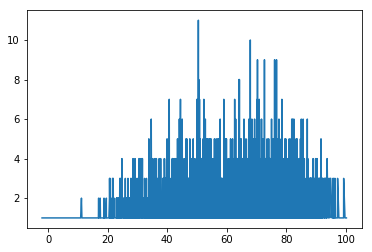

In [8]:
store["Temperature"].value_counts().sort_index().plot.line()

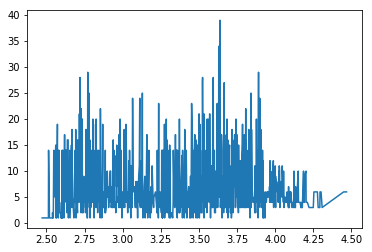

In [9]:
store["Fuel_Price"].value_counts().sort_index().plot.line()

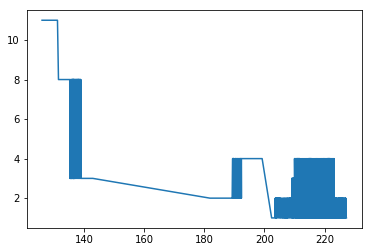

In [10]:
store["CPI"].value_counts().sort_index().plot()

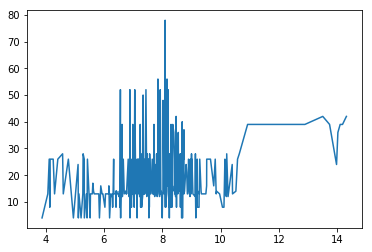

In [11]:
store["Unemployment"].value_counts().sort_index().plot.line()

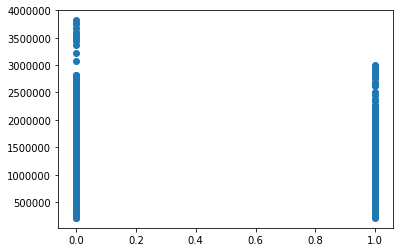

In [12]:
plt.scatter(x='Holiday_Flag',y='Weekly_Sales',data=store)
plt.show()

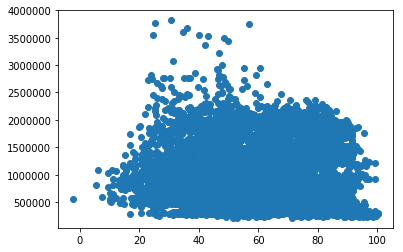

In [13]:
plt.scatter(x='Temperature',y='Weekly_Sales',data=store)
plt.show()

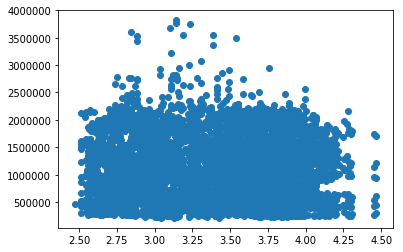

In [14]:
plt.scatter(x='Fuel_Price',y='Weekly_Sales',data=store)
plt.show()

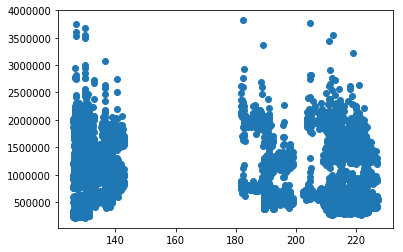

In [15]:
plt.scatter(x='CPI',y='Weekly_Sales',data=store)
plt.show()

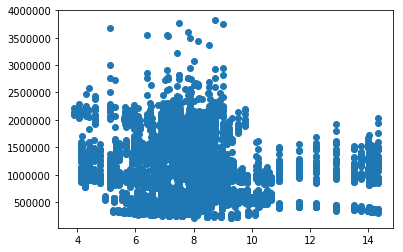

In [16]:
plt.scatter(x='Unemployment',y='Weekly_Sales',data=store)
plt.show()

In [17]:
store.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [18]:
df1 = df.drop('Store')
df2 = df1.drop('Date')
df2.show()

+------------+------------+-----------+----------+-----------+------------+
|Weekly_Sales|Holiday_Flag|Temperature|Fuel_Price|        CPI|Unemployment|
+------------+------------+-----------+----------+-----------+------------+
|   1643690.9|           0|      42.31|     2.572|211.0963582|       8.106|
|  1641957.44|           1|      38.51|     2.548|211.2421698|       8.106|
|  1611968.17|           0|      39.93|     2.514|211.2891429|       8.106|
|  1409727.59|           0|      46.63|     2.561|211.3196429|       8.106|
|  1554806.68|           0|       46.5|     2.625|211.3501429|       8.106|
|  1439541.59|           0|      57.79|     2.667|211.3806429|       8.106|
|  1472515.79|           0|      54.58|      2.72| 211.215635|       8.106|
|  1404429.92|           0|      51.45|     2.732|211.0180424|       8.106|
|  1594968.28|           0|      62.27|     2.719|210.8204499|       7.808|
|  1545418.53|           0|      65.86|      2.77|210.6228574|       7.808|
|  1466058.2

In [19]:
from pyspark.sql import functions as F
data1=F.when(df2.Temperature < 50, 0).when(df.Temperature > 86, 2).otherwise(1)
data2=F.when(df2.Fuel_Price < 2.8, 0).when(df.Fuel_Price > 3.1, 2).otherwise(1)
data3=F.when(df2.CPI < 164, 0).when(df.CPI > 218, 2).otherwise(1)
data4=F.when(df2.Unemployment < 5, 0).when(df.Unemployment > 10, 2).otherwise(1)

df2 = df2.withColumn('Temperature',data1)
df3 = df2.withColumn('Fuel_Price',data2)
df4 = df3.withColumn('CPI',data3)
df5 = df4.withColumn('Unemployment',data4)

df5.show()


+------------+------------+-----------+----------+---+------------+
|Weekly_Sales|Holiday_Flag|Temperature|Fuel_Price|CPI|Unemployment|
+------------+------------+-----------+----------+---+------------+
|   1643690.9|           0|          0|         0|  1|           1|
|  1641957.44|           1|          0|         0|  1|           1|
|  1611968.17|           0|          0|         0|  1|           1|
|  1409727.59|           0|          0|         0|  1|           1|
|  1554806.68|           0|          0|         0|  1|           1|
|  1439541.59|           0|          1|         0|  1|           1|
|  1472515.79|           0|          1|         0|  1|           1|
|  1404429.92|           0|          1|         0|  1|           1|
|  1594968.28|           0|          1|         0|  1|           1|
|  1545418.53|           0|          1|         0|  1|           1|
|  1466058.28|           0|          1|         1|  1|           1|
|  1391256.12|           0|          1|         

In [20]:
df_store=pd.read_csv("Store.csv")
df_store1=pd.read_csv("store1.csv")
df_store2=pd.read_csv("store2.csv")
df_store3=pd.read_csv("store3.csv")
file=[df_store,df_store1,df_store2,df_store3]

result=pd.concat(file)
result.to_csv("Data"+".csv",index=0,sep=',')
data=pd.read_csv("Data.csv")
print(data)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         4  05-02-2010    2135143.87             0        43.76       2.598   
1         4  12-02-2010    2188307.39             1        28.84       2.573   
2         4  19-02-2010    2049860.26             0        36.45       2.540   
3         4  26-02-2010    1925728.84             0        41.36       2.590   
4         4  05-03-2010    1971057.44             0        43.49       2.654   
5         4  12-03-2010    1894324.09             0        49.63       2.704   
6         4  19-03-2010    1897429.36             0        55.19       2.743   
7         4  26-03-2010    1762539.30             0        39.91       2.752   
8         4  02-04-2010    1979247.12             0        48.77       2.740   
9         4  09-04-2010    1818452.72             0        54.16       2.773   
10        4  16-04-2010    1851519.69             0        56.23       2.810   
11        4  23-04-2010    1802677.90   

In [21]:
df5.printSchema()

root
 |-- Weekly_Sales: double (nullable = true)
 |-- Holiday_Flag: integer (nullable = true)
 |-- Temperature: integer (nullable = false)
 |-- Fuel_Price: integer (nullable = false)
 |-- CPI: integer (nullable = false)
 |-- Unemployment: integer (nullable = false)



In [22]:
print(store.corr())

                     Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332  6.250842e-20    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag  6.250842e-20      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.223531  
Weekly_Sales    0.009464 -0.072634     -0.106176  
Holiday_Flag   -0.078347 -0.002162      0.010960  
Temperature     0.144982  0.176888      0.101158  
Fuel_Price      1.000000 -0.170642     -0.034684  
CPI            -0.170642  1.000000     -0.302020  
Unemployment   -0.034684 -0.302020      1.000000  


In [23]:
df6 = df5.drop('Holiday_Flag')
df6.show()

+------------+-----------+----------+---+------------+
|Weekly_Sales|Temperature|Fuel_Price|CPI|Unemployment|
+------------+-----------+----------+---+------------+
|   1643690.9|          0|         0|  1|           1|
|  1641957.44|          0|         0|  1|           1|
|  1611968.17|          0|         0|  1|           1|
|  1409727.59|          0|         0|  1|           1|
|  1554806.68|          0|         0|  1|           1|
|  1439541.59|          1|         0|  1|           1|
|  1472515.79|          1|         0|  1|           1|
|  1404429.92|          1|         0|  1|           1|
|  1594968.28|          1|         0|  1|           1|
|  1545418.53|          1|         0|  1|           1|
|  1466058.28|          1|         1|  1|           1|
|  1391256.12|          1|         0|  1|           1|
|  1425100.71|          1|         0|  1|           1|
|  1603955.12|          1|         1|  1|           1|
|   1494251.5|          1|         1|  1|           1|
|  1399662

In [24]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler

vec = VectorAssembler(inputCols=['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], outputCol='features')
features_df = vec.transform(df6)
 
 
features_df.printSchema()

root
 |-- Weekly_Sales: double (nullable = true)
 |-- Temperature: integer (nullable = false)
 |-- Fuel_Price: integer (nullable = false)
 |-- CPI: integer (nullable = false)
 |-- Unemployment: integer (nullable = false)
 |-- features: vector (nullable = true)



In [25]:
model_df = features_df.select('features','Weekly_Sales')
model_df.show()

+--------------------+------------+
|            features|Weekly_Sales|
+--------------------+------------+
|[1643690.9,0.0,0....|   1643690.9|
|[1641957.44,0.0,0...|  1641957.44|
|[1611968.17,0.0,0...|  1611968.17|
|[1409727.59,0.0,0...|  1409727.59|
|[1554806.68,0.0,0...|  1554806.68|
|[1439541.59,1.0,0...|  1439541.59|
|[1472515.79,1.0,0...|  1472515.79|
|[1404429.92,1.0,0...|  1404429.92|
|[1594968.28,1.0,0...|  1594968.28|
|[1545418.53,1.0,0...|  1545418.53|
|[1466058.28,1.0,1...|  1466058.28|
|[1391256.12,1.0,0...|  1391256.12|
|[1425100.71,1.0,0...|  1425100.71|
|[1603955.12,1.0,1...|  1603955.12|
|[1494251.5,1.0,1....|   1494251.5|
|[1399662.07,1.0,1...|  1399662.07|
|[1432069.95,1.0,0...|  1432069.95|
|[1615524.71,1.0,0...|  1615524.71|
|[1542561.09,1.0,0...|  1542561.09|
|[1503284.06,1.0,0...|  1503284.06|
+--------------------+------------+
only showing top 20 rows



In [26]:
train_df, test_df = model_df.randomSplit([0.7, 0.3])
print((train_df.count(),test_df.count()))


(4502, 1933)


In [27]:
from pyspark.ml.regression import LinearRegression        
lin_Reg=LinearRegression(labelCol='Weekly_Sales')                            
lr_model=lin_Reg.fit(train_df)                                              


print('{}{}'.format('Equation of the intercept:',lr_model.intercept))                     

print('{}{}'.format('Equation parameter coefficient:',lr_model.coefficients))             

training_predictions=lr_model.evaluate(train_df)                                              

print('{}{}'.format('The error difference squared:',training_predictions.meanSquaredError))            


Equation of the intercept:-2.5272037959730136e-09
Equation parameter coefficient:[1.000000000000001,1.5224178267498172e-10,-4.2548848454440736e-11,2.538613768027099e-10,9.95092431263837e-10]
The error difference squared:5.045106596182019e-19
